In [1]:
#import necessary packages: numpy, pandas, pyplot, and sankey
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

In [2]:
#read in all the 2018 csv files
divvy_2018_1 = pd.read_csv('Divvy_Trips_2018_Q1.csv', usecols = [0, 5, 7])
divvy_2018_2 = pd.read_csv('Divvy_Trips_2018_Q2.csv', usecols = [0, 5, 7])
divvy_2018_3 = pd.read_csv('Divvy_Trips_2018_Q3.csv', usecols = [0, 5, 7])
divvy_2018_4 = pd.read_csv('Divvy_Trips_2018_Q4.csv', usecols = [0, 5, 7])

#get all columns to int dtype
divvy_2018_1[['to_station_id', 'from_station_id']] = divvy_2018_1[['to_station_id', 'from_station_id']].astype(int)
divvy_2018_2[['to_station_id', 'from_station_id']] = divvy_2018_2[['to_station_id', 'from_station_id']].astype(int)
divvy_2018_3[['to_station_id', 'from_station_id']] = divvy_2018_3[['to_station_id', 'from_station_id']].astype(int)
divvy_2018_4[['to_station_id', 'from_station_id']] = divvy_2018_4[['to_station_id', 'from_station_id']].astype(int)

#list of the dataframes
divvy_dfs = [divvy_2018_1, divvy_2018_2, divvy_2018_3, divvy_2018_4]

In [3]:
#concatenate the dataframes into one
divvy_2018 = pd.concat(divvy_dfs, axis = 'rows', ignore_index = True)

In [4]:
#create functions to generalize flow data info for any given station number
#function todata() creates a dataframe that organizes inflow data by source station (stn)
def todata(df, stn):
    todf = df[df['to_station_id'] == stn]
    todf = todf.groupby('from_station_id').count().sort_values(by = 'trip_id', ascending=False)
    todf = todf.reset_index()
    todf = todf[['from_station_id', 'trip_id']]
    todf = todf.rename(columns = {'trip_id':'num_trips'})
    return todf

#function fromdata() creates a dataframe that organizes outflow data by destination station (stn)
def fromdata(df, stn):
    fromdf = df[df['from_station_id'] == stn]
    fromdf = fromdf.groupby('to_station_id').count().sort_values(by = 'trip_id', ascending=False)
    fromdf = fromdf.reset_index()
    fromdf = fromdf[['to_station_id', 'trip_id']]
    fromdf = fromdf.rename(columns = {'trip_id':'num_trips'})
    return fromdf

In [5]:
#create named dataframes using the previously defined functions
to_stn = todata(divvy_2018, 192)
from_stn = fromdata(divvy_2018, 192)

In [6]:
#read in divvy station csv
stations = pd.read_csv('Divvy_Bicycle_Stations.csv', usecols = [0, 1])

#merge to_stn with stations
to_stn = pd.merge(to_stn, stations, how = 'left', left_on = 'from_station_id', right_on = 'ID')

#merge from_stn with stations
from_stn = pd.merge(from_stn, stations, how = 'left', left_on = 'to_station_id', right_on = 'ID')

In [7]:
#define the number of trips that start and end at station of interest
total_in = to_stn.num_trips.sum()
total_out = from_stn.num_trips.sum()

#define the 
looprides = from_stn[from_stn['to_station_id'] == 192]

#assign values for inflows
in1 = to_stn.iloc[0, 1] / total_in
in2 = to_stn.iloc[1, 1] / total_in
in3 = to_stn.iloc[2, 1] / total_in
in4 = to_stn.iloc[3, 1] / total_in
in5 = to_stn.iloc[4, 1] / total_in
in6 = to_stn.iloc[5, 1] / total_in
in_rest = to_stn.iloc[6: , 1].sum() / total_in

in_vals = [in1, in2, in3, in4, in5, in6, in_rest]

#assign values for inflows
out1 = (-1) * from_stn.iloc[0, 1] / total_out
out2 = (-1) * from_stn.iloc[1, 1] / total_out
out3 = (-1) * from_stn.iloc[2, 1] / total_out
out4 = (-1) * from_stn.iloc[3, 1] / total_out
out5 = (-1) * from_stn.iloc[4, 1] / total_out
out6 = (-1) * from_stn.iloc[5, 1] / total_out
out_rest = (-1) * from_stn.iloc[6: , 1].sum() / total_out

out_vals = [out1, out2, out3, out4, out5, out6, out_rest]

In [8]:
to_stn.head(7)

,from_station_id,num_trips,ID,Station Name
0,43,4112,43,Michigan Ave & Washington St
1,195,2102,195,Columbus Dr & Randolph St
2,133,2048,133,Kingsbury St & Kinzie St
3,44,1833,44,State St & Randolph St
4,52,1772,52,Michigan Ave & Lake St
5,48,1626,48,Larrabee St & Kingsbury St
6,74,1395,74,Kingsbury St & Erie St


In [9]:
in_vals

[0.06948410753814697,
 0.03551935652849828,
 0.03460687068047787,
 0.030973825174470674,
 0.029943054123929096,
 0.027475962757059092,
 0.771996823197418]

In [10]:
from_stn.head(7)

,to_station_id,num_trips,ID,Station Name
0,43,3981,43,Michigan Ave & Washington St
1,48,2012,48,Larrabee St & Kingsbury St
2,195,1834,195,Columbus Dr & Randolph St
3,133,1830,133,Kingsbury St & Kinzie St
4,44,1343,44,State St & Randolph St
5,47,1292,47,State St & Kinzie St
6,66,1185,66,Clinton St & Lake St


In [11]:
out_vals

[-0.06353943882274077,
 -0.03211287387876273,
 -0.02927187410221215,
 -0.02920803141060427,
 -0.021435183707345103,
 -0.020621189389344655,
 -0.8038114086889904]

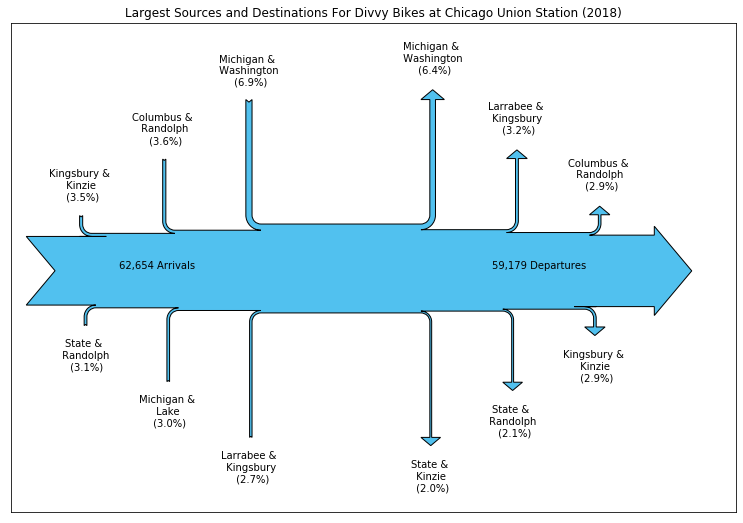

In [19]:
#create a sankey diagram that shows the 6 largest inflows and outflows for the given station
fig = plt.figure(figsize=(13,9))
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[], title = "Largest Sources and Destinations For Divvy Bikes at Chicago Union Station (2018)")
sankey = Sankey(ax = ax, unit = None, shoulder = 0.1, scale = 1, offset = 0.35, gap = 0.9)
sankey.add(flows=[in1, in2, in3, in4, in5, in6, in_rest, out1, out2, out3, out4, out5, out6, out_rest],
       labels=['Michigan & \n Washington \n (6.9%)', 'Columbus & \n Randolph \n (3.6%)', 'Kingsbury & \n Kinzie \n (3.5%)', 'State & \n Randolph \n (3.1%)', 'Michigan & \n Lake \n (3.0%)', 'Larrabee & \n Kingsbury \n (2.7%)', '', 'Michigan & \n Washington \n (6.4%)', 'Larrabee & \n Kingsbury \n (3.2%)', 'Columbus & \n Randolph \n (2.9%)', 'Kingsbury & \n Kinzie \n (2.9%)', 'State & \n Randolph \n (2.1%)', 'State & \n Kinzie \n (2.0%)', ''],
       orientations=[1, 1, 1, -1, -1, -1, 0, 1, 1, 1, -1, -1, -1, 0], 
       pathlengths = [1.4, 0.8, 0.2, 0.2, 0.8, 1.4, 0.6, 1.4, 0.8, 0.2, 0.2, 0.8, 1.4, 0.6],
       trunklength = 2, 
       fc = (0.316, 0.758, 0.937, 1),
       ec = 'k')
plt.text(-2.5,0,'62,654 Arrivals')
plt.text(1.7,0,'59,179 Departures')
diagrams = sankey.finish()

#save the figure
plt.savefig('stn192.png', dpi=300)